## Problem 1

If $X \sim \text{Exponential}(\beta)$ then $f_X = \beta e^{-\beta x}, \mu_X = 1/\beta,
\sigma^2_X = 1/\beta^2$. Therefore Chebyshev's inequality is
$$
P(|X - \mu_X| \ge k\sigma_X) \le \frac{1}{k^2}.
$$
Now, $|X - \mu_X| \ge k\sigma_X \Rightarrow X - \mu_X \ge k\sigma_X$ or 
$-X + \mu_X\le - k\sigma_X$, that is $X \ge \mu_X + k\sigma_X$ or $X \le 
-(\mu_X + k\sigma_X)$. An exponential random variable is non-negative. 
Therefore, $|X - \mu_X| \ge k\sigma_X \Rightarrow X \ge \mu_X + k\sigma_X$
alone and hence,
$$
P(|X - \mu_X| \ge k\sigma_X) = 
\int_{\mu_X + k\sigma_X}^\infty \beta e^{-\beta x}dx
= e^{-\beta(\mu_X + k\sigma_X)} = e^{-(1+k)}
$$

We will now compare $e^{-(1 + k)}$ with $1/k^2$ by plotting them.

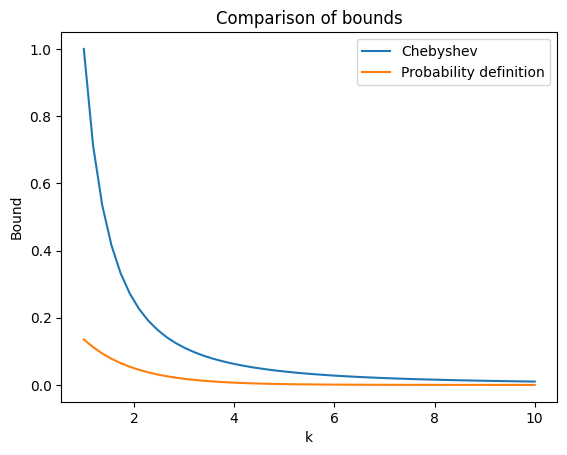

In [9]:
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(1, 10)
y1 = 1/k**2
y2 = np.exp(-1 - k)

plt.plot(k, y1, label='Chebyshev')
plt.plot(k, y2, label='Probability definition')
plt.title('Comparison of bounds')
plt.xlabel('k')
plt.ylabel('Bound')
_ = plt.legend()

## Problem 2

Chebyshev's inequality is $P(|X - \mu| \ge t) \le \sigma^2/t^2$. For a Poisson random variable with parameter $\lambda$, $\mu = \lambda, \sigma = \sqrt{\lambda}$ so that $X \ge 2\lambda = X - \lambda \ge \lambda$ and hence
$$
P(X \ge 2\lambda) = P(|X - \mu| > \lambda) \le \frac{\lambda}{\lambda^2} = \frac{1}{\lambda}.
$$

## Problem 3

Given that $X_1, \ldots, X_n \sim \text{Bernoulli}(p)$ and $\bar{X}_n = n^{-1}\sum_{i=1}^nX_i$. If $Y = \bar{X}_n$, $E(Y) = p$ and $\text{var}(Y) = pq/\sqrt{n}$, where $q = 1 - p$. 

Using Chebyshev's inequality,
$$
P(|Y - E(Y)| > \epsilon) = P(|\bar{X}_n - p| > \epsilon) \le \frac{pq}{\epsilon^2\sqrt{n}}
$$

Using Hoeffding's inquality,
$$
P(|\bar{X}_n - p| > \epsilon) \le 2e^{-2n\epsilon^2}.
$$
We will compare the two bounds for $p = 0.7$ and $\epsilon = 0.1$.

In [6]:
p = 0.7
q = 1 - p
epsilon = 0.1
ns = [n for n in range(5, 100, 5)]
cbs = [p*q/(epsilon**2 * np.sqrt(n)) for n in ns]
hbs = [2 * np.exp(-2 * n * epsilon**2) for n in ns]

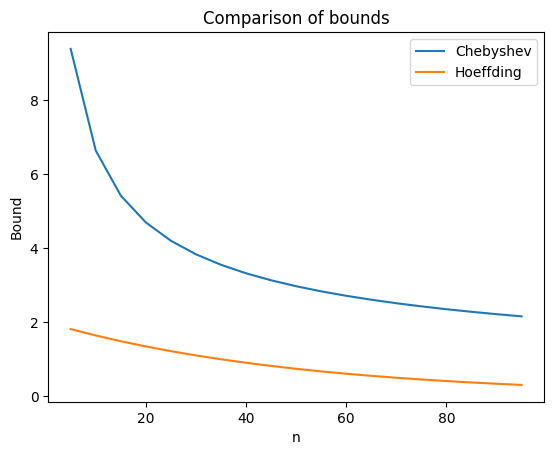

In [8]:
plt.plot(ns, cbs, label='Chebyshev')
plt.plot(ns, hbs, label='Hoeffding')
plt.title('Comparison of bounds')
plt.xlabel('n')
plt.ylabel('Bound')
_ = plt.legend()

## Problem 4

Hoeffding inequality for $Y = (X_1 + \cdots + X_n)/n$, where $X_i \sim \text{Bernoulli}(p)$ is $P(|Y - p| \ge \epsilon_n) \le 2e^{-2n\epsilon_n^2}$. If
$$
\epsilon_n = \sqrt{\frac{1}{2n}\log\left(\frac{2}{\alpha}\right)}
$$
then
$$
2n\epsilon_n^2 = \log\left(\frac{2}{\alpha}\right)
$$
and 
$$
e^{-2n\epsilon_n^2} = \frac{\alpha}{2}.
$$
Therefore, Hoeffding's inequality now reads $P(|Y - p| \ge \epsilon_n) \le \alpha$. $|Y - p| \ge \epsilon_n \Rightarrow Y - p \ge \epsilon_n$ and $-Y + p \le -\epsilon_n$, that is $Y \ge p + \epsilon_n$ and $-Y \le -p - \epsilon_n$. The complement of this event is $|Y - p| < \epsilon_n$ that is $Y \in (p - \epsilon_n, p + \epsilon_n)$ and its probability is $\ge (1 - \alpha)$.

In [36]:
alpha = 0.05
p = 0.4
rng = np.random.default_rng(12111842)
maxSamples = 10000
sampleSizes = [s for s in range(100, maxSamples + 1, 100)]

In [31]:
def inInterval(xbar, epsilon_n, p) -> int:
    # Check if p is in the interval (xbar - epsilon_n, xbar + epsilon_n).
    return 1 if (xbar - epsilon_n < p) and (p < xbar + epsilon_n) else 0
    
def estimate(n, alpha, p, nSimulations = 100) -> int:
    # How many times does parametric mean lie between epsilon_n neighbourhood of sample means?
    epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
    return np.sum([inInterval(np.mean(rng.binomial(n=1,p=p,size=n)), epsilon_n, p) for i in range(nSimulations)])

In [37]:
allEstimates = [estimate(n, alpha, p) for n in sampleSizes]

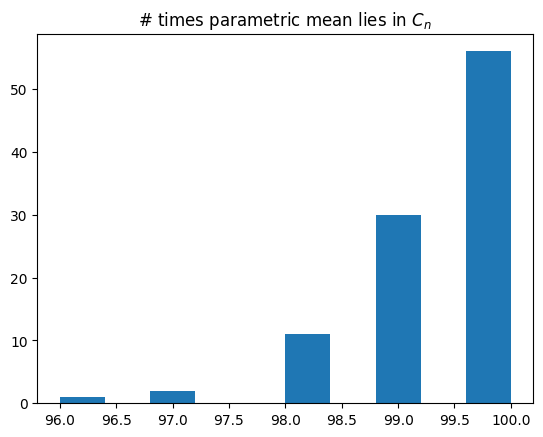

In [38]:
plt.hist(allEstimates)
_ = plt.title(f'# times parametric mean lies in $C_n$')

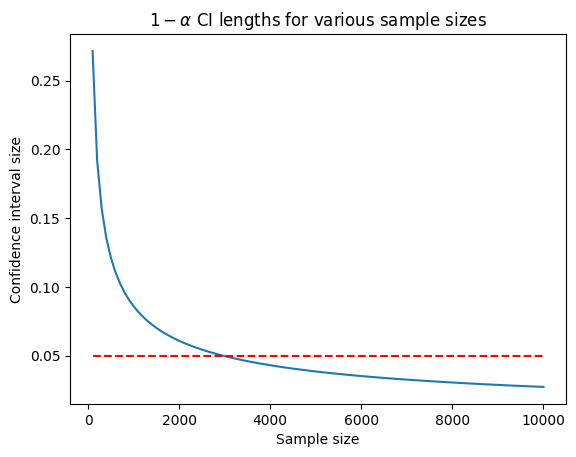

In [44]:
intervalLen = [2 * np.sqrt(np.log(2/alpha)/(2*n)) for n in sampleSizes]
plt.plot(sampleSizes, intervalLen)
plt.hlines(y=0.05, xmin=sampleSizes[0], xmax=sampleSizes[len(sampleSizes) - 1], color='red', linestyle='dashed')
plt.xlabel('Sample size')
plt.ylabel('Confidence interval size')
_ = plt.title(r'$1 - \alpha$ CI lengths for various sample sizes')

Thus, to get an interval width less than $0.05$, we need approximately $3000$ samples or more.

## Problem 5

$|Z| \ge t \Rightarrow -Z \le -t$ and $Z \ge t$. Since the distribution is 
symmetric, $P(-Z \le -t) = P(Z \ge t)$ and hence $P(|Z| \ge t) = 2P(Z \ge t)$.
Now,
$$
P(Z \ge t) = \frac{1}{\sqrt{2\pi}}\int_t^\infty e^{-z^2/2}dz
$$
so that
$$
tP(Z \ge t) = \frac{t}{\sqrt{2\pi}}\int_t^\infty e^{-z^2/2}dz 
\le \frac{1}{\sqrt{2\pi}}\int_t^\infty ze^{-z^2/2}dz.
$$ 
If $u = z^2/2$, $zdz = du$ and the limits of integration go from $t^2/2$ to 
$\infty$, so that
$$
tP(Z \ge t) \le \frac{1}{\sqrt{2\pi}}\int_{t^2/2}^\infty e^{-u}du = 
\frac{1}{\sqrt{2\pi}}e^{-t^2/2}.
$$
That is,
$$
P(Z \ge t) \le \frac{1}{\sqrt{2\pi}}\frac{e^{-t^2/2}}{t}
$$
from which Mill's inequality follows immediately.

## Problem 6

If $Z \sim N(0, 1)$, $|Z|$ is a non-negative random variable and Markov's inequality states that
$$
P(|Z| \ge t) \le \frac{E(|Z|)}{t}.
$$
We can easily find,
$$
E(|Z|) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty |z|e^{-z^2/2}dz = -\frac{1}{\sqrt{2\pi}}\int_{-\infty}^0 ze^{-z^2/2}dz + \frac{1}{\sqrt{2\pi}}\int_0^\infty ze^{-z^2/2}dz = 
\sqrt{\frac{2}{\pi}}\int_0^\infty ze^{-z^2/2}dz = \sqrt{\frac{2}{\pi}}.
$$
Therefore, Markov's inequality is
$$\tag{1}
P(|Z| \ge t) \le \sqrt{\frac{2}{\pi}}\frac{1}{t}.
$$
On the other hand, Mill's inequality is
$$\tag{2}
P(|Z| \ge t) \le \frac{2}{\pi}\frac{e^{-t^2/2}}{t}.
$$
We will compare the bounds for various values of $t$.

In [46]:
ts = [t for t in range(1, 10)]
markovs = np.sqrt(2/np.pi) * 1/ts
mills = np.array([np.exp(-0.5 * t**2)/t for t in ts]) * 2 /np.pi

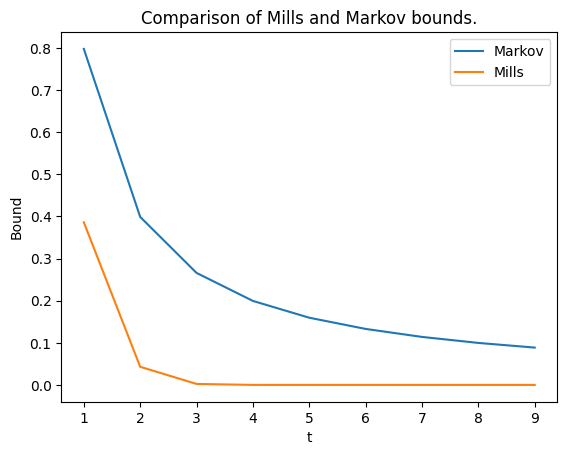

In [47]:
plt.plot(ts, markovs, label='Markov')
plt.plot(ts, mills, label='Mills')
plt.legend()
plt.xlabel('t')
plt.ylabel('Bound')
_ = plt.title('Comparison of Mills and Markov bounds.')

## Problem 7

If $X_1, \ldots, X_n \sim N(0, 1)$ then $Y = |\bar{X}_n| \sim N(0, 1/\sqrt{n})$ and $Z = \sqrt{n}Y \sim N(0, 1)$. Now, $|Y| > t \Rightarrow |Z| > t\sqrt{n}$. Therefore, Mill's inequality for $Y$ is
$$
P(|Y| > t) \le \frac{2}{\pi}\frac{e^{-nt^2/2}}{t\sqrt{n}}.
$$
Chebyshev's inequality for the same probability is
$$
P(|Y| > t) \le \frac{\sigma_Y^2}{t^2} = \frac{1}{nt^2},
$$
which is clearly a looser bound than Mills'.